**Oil Production from Alberta, Canada in 2024. A detailed analysis for the last year.**


In [ ]:
#Importing libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import chardet
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
drive.mount('/content/drive')
import requests
import io
import zipfile



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def download_data(url):
  # Step 1: Download the .zip file
  response = requests.get(url)
  if response.status_code == 200:
      print("Download successful!")
  else:
      print(f"Failed to download file. Status code: {response.status_code}")

  # Step 2: Extract the outer .zip file in memory
  with zipfile.ZipFile(io.BytesIO(response.content)) as outer_zip:
    # List the files in the outer .zip file
      outer_files = outer_zip.namelist()
      print(f"Files in the outer zip: {outer_files}")

    # Assuming the inner .zip file is the first file
      inner_zip_name = outer_files[0]

    # Step 3: Extract the inner .zip file
      with outer_zip.open(inner_zip_name) as inner_zip_file:
          with zipfile.ZipFile(io.BytesIO(inner_zip_file.read())) as inner_zip:
            # List the files in the inner .zip file
              inner_files = inner_zip.namelist()
              print(f"Files in the inner zip: {inner_files}")

            # Assuming the .csv file is the first file in the inner .zip
              csv_file_name = inner_files[0]

            # Step 4: Load the .csv file into a pandas DataFrame
              with inner_zip.open(csv_file_name) as csv_file:
                  data = pd.read_csv(csv_file)

              return data



In [ ]:
# Importing data from first 4 months of 2024

url_Jan = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-01/CSV"
url_Feb = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-02/CSV"
url_Mar = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-03/CSV"
url_Apr = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-04/CSV"
url_May = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-05/CSV"
url_Jun = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-06/CSV"
url_Jul = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-07/CSV"
url_Aug = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-08/CSV"
url_Sep = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-09/CSV"
url_Oct = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-10/CSV"
url_Nov = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-11/CSV"
url_Dec = "https://www.petrinex.gov.ab.ca/publicdata/API/Files/AB/Vol/2024-12/CSV"


data_Jan=download_data(url_Jan)
data_Feb=download_data(url_Feb)
data_Mar=download_data(url_Mar)
data_Apr=download_data(url_Apr)
data_May=download_data(url_May)
data_Jun=download_data(url_Jun)
data_Jul=download_data(url_Jul)
data_Aug=download_data(url_Aug)
data_Sep=download_data(url_Sep)
data_Oct=download_data(url_Oct)
data_Nov=download_data(url_Nov)
#data_Dec=download_data(url_Dec)

Download successful!
Files in the outer zip: ['Vol_2024-01-AB.csv.zip']
Files in the inner zip: ['Vol_2024-01-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-02-AB.csv.zip']
Files in the inner zip: ['Vol_2024-02-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-03-AB.csv.zip']
Files in the inner zip: ['Vol_2024-03-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-04-AB.csv.zip']
Files in the inner zip: ['Vol_2024-04-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-05-AB.csv.zip']
Files in the inner zip: ['Vol_2024-05-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-06-AB.csv.zip']
Files in the inner zip: ['Vol_2024-06-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-07-AB.csv.zip']
Files in the inner zip: ['Vol_2024-07-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-08-AB.csv.zip']
Files in the inner zip: ['Vol_2024-08-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-09-AB.csv.zip']
Files in the inner zip: ['Vol_2024-09-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-10-AB.csv.zip']
Files in the inner zip: ['Vol_2024-10-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


Download successful!
Files in the outer zip: ['Vol_2024-11-AB.csv.zip']
Files in the inner zip: ['Vol_2024-11-AB.CSV']


<ipython-input-2-35c57684ff38>:30: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


In [ ]:
print(data_Jan.info())
print(data_Feb.info())
print(data_Mar.info())
print(data_Apr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568334 entries, 0 to 568333
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ProductionMonth                 568334 non-null  object 
 1   OperatorBAID                    568334 non-null  object 
 2   OperatorName                    568334 non-null  object 
 3   ReportingFacilityID             568334 non-null  object 
 4   ReportingFacilityProvinceState  568334 non-null  object 
 5   ReportingFacilityType           568334 non-null  object 
 6   ReportingFacilityIdentifier     568334 non-null  int64  
 7   ReportingFacilityName           568334 non-null  object 
 8   ReportingFacilitySubType        568334 non-null  int64  
 9   ReportingFacilitySubTypeDesc    568334 non-null  object 
 10  ReportingFacilityLocation       568334 non-null  object 
 11  FacilityLegalSubdivision        568334 non-null  int64  
 12  FacilitySection 

We will focus only on Oil production. Let's filter the data for that and drop unnecessary columns

In [ ]:
data_Jan=data_Jan[(data_Jan['ProductID']=='OIL')&(data_Jan['ActivityID']=='PROD')]
data_Feb=data_Feb[(data_Feb['ProductID']=='OIL')&(data_Feb['ActivityID']=='PROD')]
data_Mar=data_Mar[(data_Mar['ProductID']=='OIL')&(data_Mar['ActivityID']=='PROD')]
data_Apr=data_Apr[(data_Apr['ProductID']=='OIL')&(data_Apr['ActivityID']=='PROD')]
data_May=data_May[(data_May['ProductID']=='OIL')&(data_May['ActivityID']=='PROD')]
data_Jun=data_Jun[(data_Jun['ProductID']=='OIL')&(data_Jun['ActivityID']=='PROD')]
data_Jul=data_Jul[(data_Jul['ProductID']=='OIL')&(data_Jul['ActivityID']=='PROD')]
data_Aug=data_Aug[(data_Aug['ProductID']=='OIL')&(data_Aug['ActivityID']=='PROD')]
data_Sep=data_Sep[(data_Sep['ProductID']=='OIL')&(data_Sep['ActivityID']=='PROD')]
data_Oct=data_Oct[(data_Oct['ProductID']=='OIL')&(data_Oct['ActivityID']=='PROD')]
data_Nov=data_Nov[(data_Nov['ProductID']=='OIL')&(data_Nov['ActivityID']=='PROD')]
#data_Dec=data_Dec[(data_Dec['ProductID']=='OIL')&(data_Dec['ActivityID']=='PROD')]

Now that we have the data loaded, we can start by doing several analysis. Let's start by a simple one: let's do a production sumation by company

In [ ]:
combined_df=pd.concat([data_Jan, data_Feb,data_Mar,data_Apr,data_May,data_Jun,data_Jul,data_Aug,data_Sep,data_Oct,data_Nov], ignore_index=True)
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462817 entries, 0 to 462816
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ProductionMonth                 462817 non-null  object 
 1   OperatorBAID                    462817 non-null  object 
 2   OperatorName                    462817 non-null  object 
 3   ReportingFacilityID             462817 non-null  object 
 4   ReportingFacilityProvinceState  462817 non-null  object 
 5   ReportingFacilityType           462817 non-null  object 
 6   ReportingFacilityIdentifier     462817 non-null  int64  
 7   ReportingFacilityName           462817 non-null  object 
 8   ReportingFacilitySubType        462817 non-null  int64  
 9   ReportingFacilitySubTypeDesc    462817 non-null  object 
 10  ReportingFacilityLocation       462817 non-null  object 
 11  FacilityLegalSubdivision        462817 non-null  int64  
 12  FacilitySection 

In [ ]:
combined_df=combined_df.dropna(axis=1,how='all')
combined_df=combined_df.drop(['ProductID','ActivityID'],axis=1)
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462817 entries, 0 to 462816
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ProductionMonth                 462817 non-null  object
 1   OperatorBAID                    462817 non-null  object
 2   OperatorName                    462817 non-null  object
 3   ReportingFacilityID             462817 non-null  object
 4   ReportingFacilityProvinceState  462817 non-null  object
 5   ReportingFacilityType           462817 non-null  object
 6   ReportingFacilityIdentifier     462817 non-null  int64 
 7   ReportingFacilityName           462817 non-null  object
 8   ReportingFacilitySubType        462817 non-null  int64 
 9   ReportingFacilitySubTypeDesc    462817 non-null  object
 10  ReportingFacilityLocation       462817 non-null  object
 11  FacilityLegalSubdivision        462817 non-null  int64 
 12  FacilitySection               

Seems like we need to clean the data. The columns production month and SubmissionDate should be date, the columns Volume and hours should be Decimal

In [ ]:
combined_df['ProductionMonth']=pd.to_datetime(combined_df['ProductionMonth'])
combined_df['SubmissionDate']=pd.to_datetime(combined_df['SubmissionDate'])
combined_df['Volume']=combined_df['Volume'].astype(float)
print(combined_df.info())
print(combined_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462817 entries, 0 to 462816
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ProductionMonth                 462817 non-null  datetime64[ns]
 1   OperatorBAID                    462817 non-null  object        
 2   OperatorName                    462817 non-null  object        
 3   ReportingFacilityID             462817 non-null  object        
 4   ReportingFacilityProvinceState  462817 non-null  object        
 5   ReportingFacilityType           462817 non-null  object        
 6   ReportingFacilityIdentifier     462817 non-null  int64         
 7   ReportingFacilityName           462817 non-null  object        
 8   ReportingFacilitySubType        462817 non-null  int64         
 9   ReportingFacilitySubTypeDesc    462817 non-null  object        
 10  ReportingFacilityLocation       462817 non-null  object 

In [ ]:
company_analysis = combined_df.groupby(['ProductionMonth','OperatorName'],as_index=False).agg({
    'Volume': 'sum'  # Summing up the oil volume per company
}).reset_index()

# Rename the aggregated column for clarity
company_analysis.rename(columns={'Volume': 'Total_Volume'}, inplace=True)
company_analysis.rename(columns={'ProductionMonth': 'Production_Date'}, inplace=True)
#Transforming m3 to bbl
company_analysis['Total_Volume']=company_analysis['Total_Volume']*6.28981
# Display the result
print(company_analysis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            3616 non-null   int64         
 1   Production_Date  3616 non-null   datetime64[ns]
 2   OperatorName     3616 non-null   object        
 3   Total_Volume     3616 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 113.1+ KB
None


In [ ]:
print(company_analysis['Total_Volume'].describe())


count    3.616000e+03
mean     2.186005e+05
std      1.230281e+06
min      6.289810e-01
25%      7.598090e+02
50%      3.866661e+03
75%      4.074791e+04
max      1.583336e+07
Name: Total_Volume, dtype: float64


Let's see the companies that are on below 1% quantile and above the 99% quantile

In [ ]:
top_companies = company_analysis[company_analysis['Total_Volume'] > company_analysis['Total_Volume'].quantile(0.95)]
low_companies = company_analysis[company_analysis['Total_Volume'] < company_analysis['Total_Volume'].quantile(0.05)]
print(top_companies.info())
print(company_analysis['Total_Volume'].quantile(0.95))
print(low_companies.info())
print(company_analysis['Total_Volume'].quantile(0.05))

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 27 to 3595
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            181 non-null    int64         
 1   Production_Date  181 non-null    datetime64[ns]
 2   OperatorName     181 non-null    object        
 3   Total_Volume     181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.1+ KB
None
594768.836467
<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 28 to 3582
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            180 non-null    int64         
 1   Production_Date  180 non-null    datetime64[ns]
 2   OperatorName     180 non-null    object        
 3   Total_Volume     180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
mem

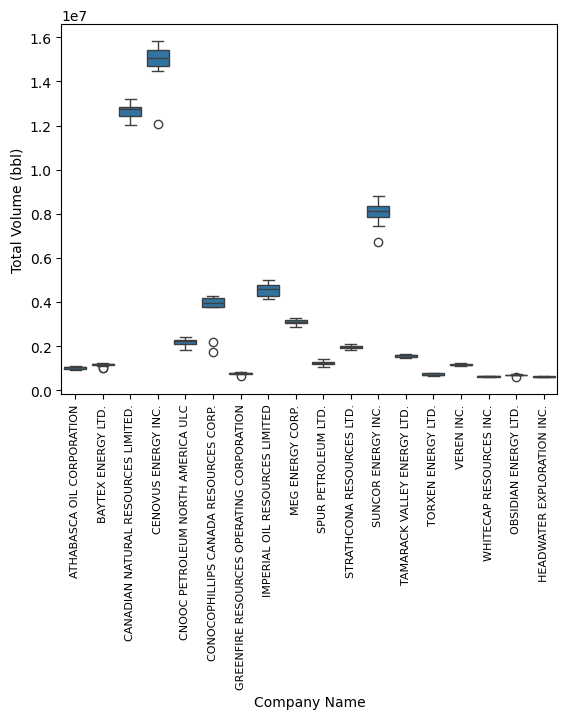

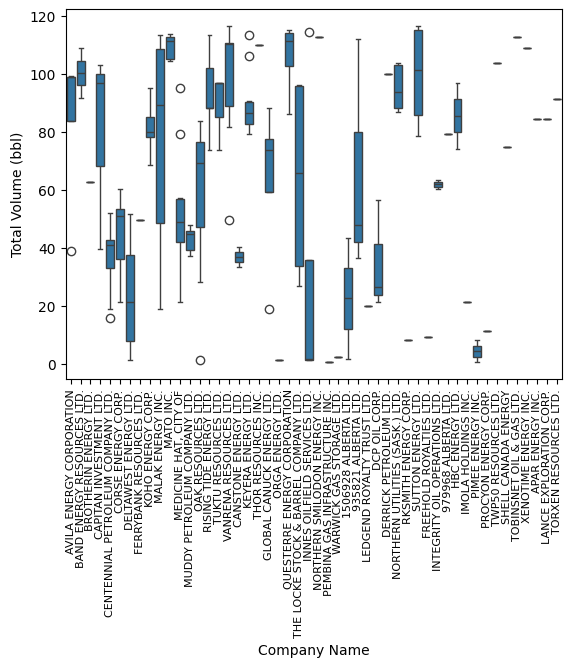

In [ ]:
sns.boxplot(data=top_companies,x='OperatorName',y='Total_Volume')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Company Name')
plt.show()

sns.boxplot(data=low_companies,x='OperatorName',y='Total_Volume')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Company Name')
plt.show()


As we can see, there's 18 companies above the 95% quantile and 40 companies below the 5% quantile. This means that at some point of the year these companies either produced a lot of oil (above 600000 BBl) or not enough (117 BBl)

According to the 2024 data, the top 5 companies that produced more oil from all Alberta are:

1. Cenovus Energy Inc.
2. Canadian Natural Resources Limited
3. Suncor Energy Inc.
4. Imperial Oil Resources Limited
5. Conoco Philips Canada Resources Corp

Let's study their growth throuhout the year 2024.

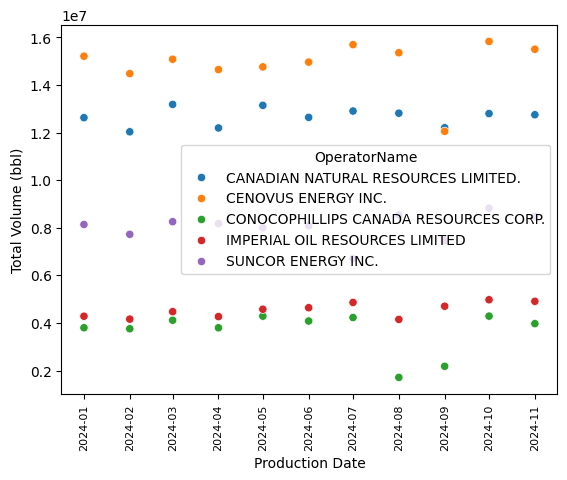

In [ ]:
Top5=company_analysis[company_analysis['OperatorName'].isin(['CENOVUS ENERGY INC.', 'CANADIAN NATURAL RESOURCES LIMITED.', 'SUNCOR ENERGY INC.', 'IMPERIAL OIL RESOURCES LIMITED', 'CONOCOPHILLIPS CANADA RESOURCES CORP.'])]

sns.scatterplot(data=Top5,x='Production_Date',y='Total_Volume',hue='OperatorName')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

As we can see, each company has a stable production of oil thoroughout the year, with an exception during september for most of the companies.

There does not seem to be any seasonal production peak, although it can be noted that for March, June, July and October the production increased compared to the previous month for all the companies.

Lets visualize to the total Oil produced in Alberta for each company



In [ ]:
Total_2024 = combined_df.groupby('OperatorName',as_index=False).agg({
    'Volume': 'sum'  # Summing up the oil volume per company
}).reset_index()

Total_2024.rename(columns={'Volume': 'Total_Volume'}, inplace=True)
#Transforming m3 to bbl
Total_2024['Total_Volume']=Total_2024['Total_Volume']*6.28981
# Display the result
print(Total_2024.info())

Total_2024 = Total_2024.sort_values(by='Total_Volume', ascending=False)

# Top 10 companies
top_5 = Total_2024.head(5)

# Combine other companies into a single category
other_production = Total_2024.iloc[5:]['Total_Volume'].sum()
other_row = pd.DataFrame({'OperatorName': ['Other'], 'Total_Volume': [other_production]})
top_5 = pd.concat([top_5, other_row], ignore_index=True)

print(top_5.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         359 non-null    int64  
 1   OperatorName  359 non-null    object 
 2   Total_Volume  359 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.5+ KB
None
   index                           OperatorName  Total_Volume
0   72.0                    CENOVUS ENERGY INC.  1.636035e+08
1   64.0    CANADIAN NATURAL RESOURCES LIMITED.  1.393231e+08
2  300.0                     SUNCOR ENERGY INC.  8.841429e+07
3  159.0         IMPERIAL OIL RESOURCES LIMITED  5.003420e+07
4   86.0  CONOCOPHILLIPS CANADA RESOURCES CORP.  4.024286e+07


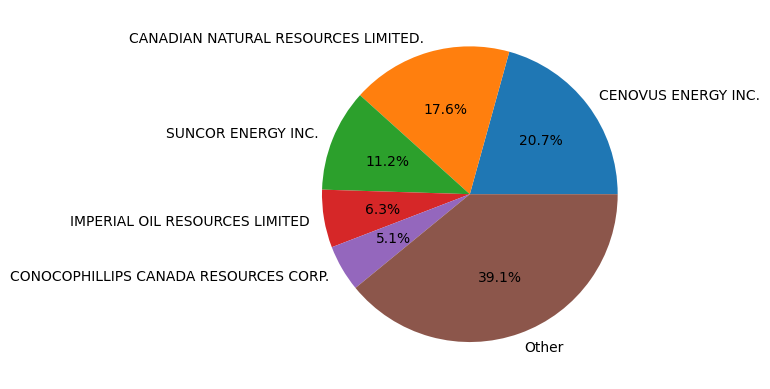

In [ ]:
plt.pie(top_5['Total_Volume'], labels=top_5['OperatorName'], autopct='%1.1f%%')
plt.show()

Impressively, The top 5 companies produced the equivalent of 61% of all oil during 2024, while the rest of the companies the total of 39.1%.

Now lets proceed to analyze the top provinces for each of these top 5 companies individually

In [ ]:
combined_df['Region'] = combined_df['FacilityMeridian'].astype(str) + '-' + combined_df['FacilityRange'].astype(str) + '-' + combined_df['FacilityTownship'].astype(str)

# Group data by the region and calculate total production
regional_summary = combined_df.groupby(['ProductionMonth','OperatorName','Region'])['Volume'].sum().reset_index()

# Sort by production volume (optional)
regional_summary = regional_summary.sort_values(by='Volume', ascending=False)
regional_summary.rename(columns={'Volume': 'Total_Volume'}, inplace=True)
regional_summary.rename(columns={'ProductionMonth': 'Production_Date'}, inplace=True)
#Transforming m3 to bbl
regional_summary['Total_Volume']=regional_summary['Total_Volume']*6.28981
# Display the result
print(regional_summary.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32934 entries, 27829 to 3906
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Production_Date  32934 non-null  datetime64[ns]
 1   OperatorName     32934 non-null  object        
 2   Region           32934 non-null  object        
 3   Total_Volume     32934 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.3+ MB
None


In [ ]:
print(regional_summary['Total_Volume'].describe())


count    3.293400e+04
mean     2.400132e+04
std      2.559442e+05
min      6.289810e-01
25%      2.075637e+02
50%      7.758481e+02
75%      4.068564e+03
max      7.979192e+06
Name: Total_Volume, dtype: float64


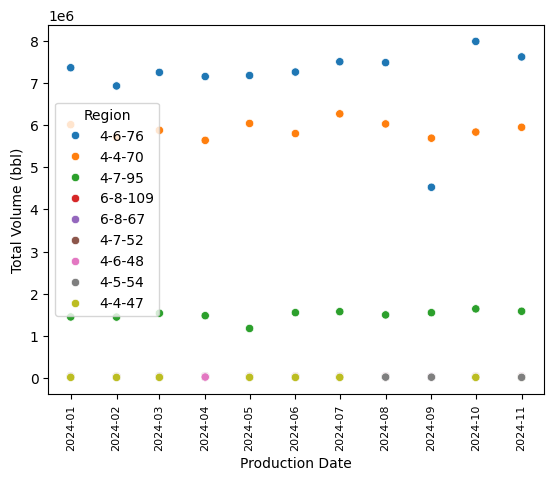

In [ ]:
Cenovus_Top_region=regional_summary[(regional_summary['OperatorName']=='CENOVUS ENERGY INC.')&(regional_summary['Total_Volume'] > regional_summary['Total_Volume'].quantile(0.9))]

sns.scatterplot(data=Cenovus_Top_region,x='Production_Date',y='Total_Volume',hue='Region')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

This graphic shows clearly 3 regions where Cenovus production excelled.

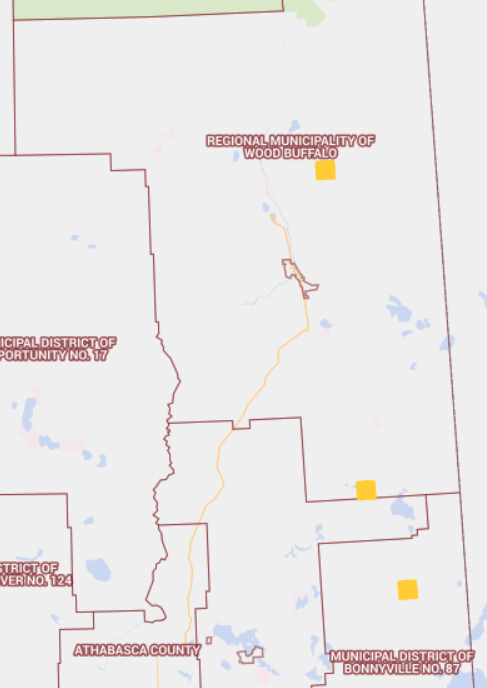

The top 3 zones are located in the map. Let's see what these 3 zones amount to the rest of Cenovus Production

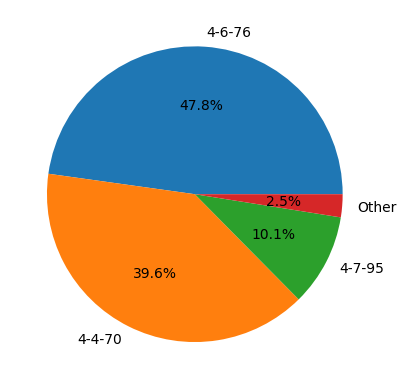

In [ ]:
Region_total = regional_summary.groupby(['OperatorName','Region'],as_index=False).agg({
    'Total_Volume': 'sum'  # Summing up the oil volume per company
}).reset_index()

Cenovus_total=Region_total[Region_total['OperatorName']=='CENOVUS ENERGY INC.']
Cenovus_total = Cenovus_total.drop(columns=['OperatorName'])

Cenovus_total = Cenovus_total.sort_values(by='Total_Volume', ascending=False)

# Top 10 companies
top_3_Cenovus = Cenovus_total.head(3)

# Combine other companies into a single category
others_Cen = Cenovus_total.iloc[3:]['Total_Volume'].sum()
other_row = pd.DataFrame({'Region': ['Other'], 'Total_Volume': [others_Cen]})
top_3_Cenovus = pd.concat([top_3_Cenovus, other_row], ignore_index=True)

plt.pie(top_3_Cenovus['Total_Volume'], labels=top_3_Cenovus['Region'], autopct='%1.1f%%')
plt.show()

Interestingly, the top 3 regions represent 97.5% of all production for Cenovus. Let's explore the same for the other 4 companies

CNRL

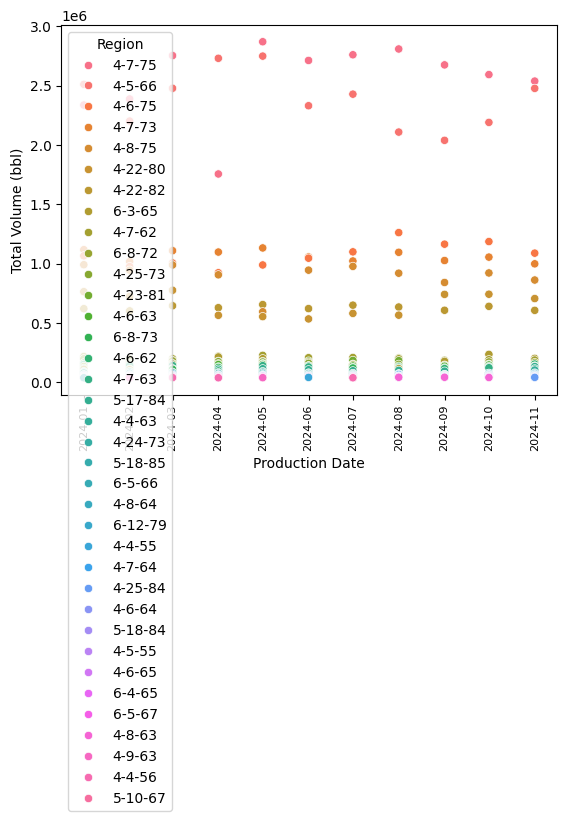

In [ ]:
CNRL_Top_region=regional_summary[(regional_summary['OperatorName']=='CANADIAN NATURAL RESOURCES LIMITED.')&(regional_summary['Total_Volume'] > regional_summary['Total_Volume'].quantile(0.95))]

sns.scatterplot(data=CNRL_Top_region,x='Production_Date',y='Total_Volume',hue='Region')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

For CNRL, there are a lot more zones that  produce over 95% of the quantile. For this scenario, we will look at regions that produces more than 800000 BBL per month. Let's explore the top 5 regions

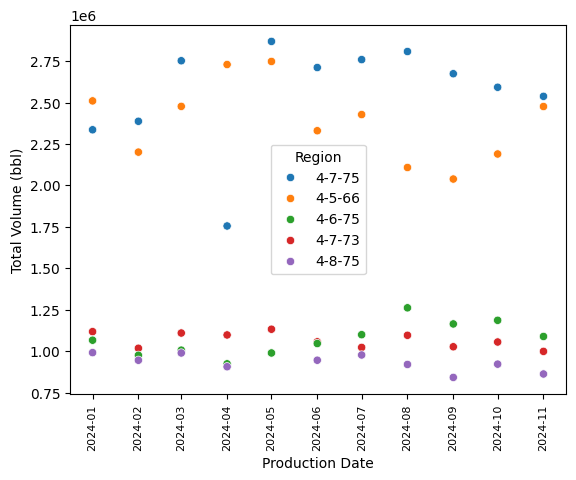

In [ ]:
CNRL_Top_region=regional_summary[(regional_summary['OperatorName']=='CANADIAN NATURAL RESOURCES LIMITED.')&(regional_summary['Total_Volume'] > 8e5)]

sns.scatterplot(data=CNRL_Top_region,x='Production_Date',y='Total_Volume',hue='Region')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

This graphic shows clearly 3 regions where Cenovus production excelled.

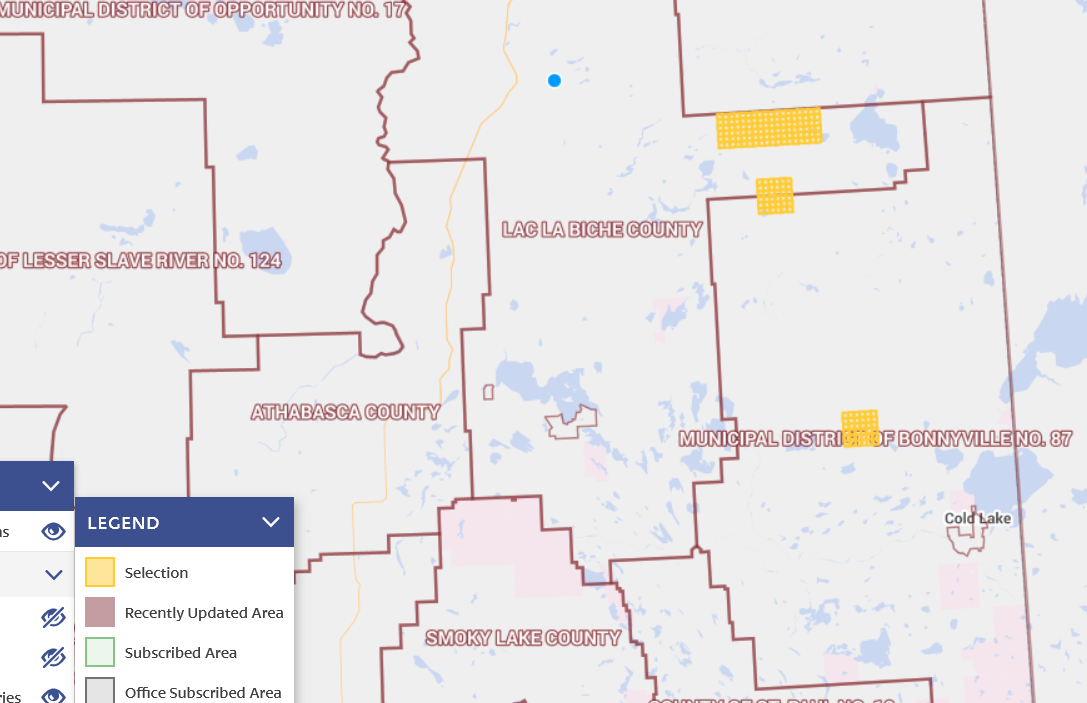

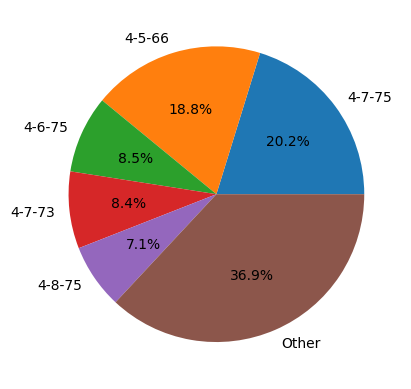

In [ ]:
CNRL_total=Region_total[Region_total['OperatorName']=='CANADIAN NATURAL RESOURCES LIMITED.']
CNRL_total = CNRL_total.drop(columns=['OperatorName'])

CNRL_total = CNRL_total.sort_values(by='Total_Volume', ascending=False)

# Top 10 companies
top_5_CNRL = CNRL_total.head(5)

# Combine other companies into a single category
others_CNRL = CNRL_total.iloc[5:]['Total_Volume'].sum()
other_row = pd.DataFrame({'Region': ['Other'], 'Total_Volume': [others_CNRL]})
top_5_CNRL = pd.concat([top_5_CNRL, other_row], ignore_index=True)

plt.pie(top_5_CNRL['Total_Volume'], labels=top_5_CNRL['Region'], autopct='%1.1f%%')
plt.show()

We can see now the comparison between the top 5 regions for CNRL and compared to the rest of their production. It is very different from Cenovus, it seems like CNRL production is way more diversified, however over 63% of it's total production comes from the top 5 regions.

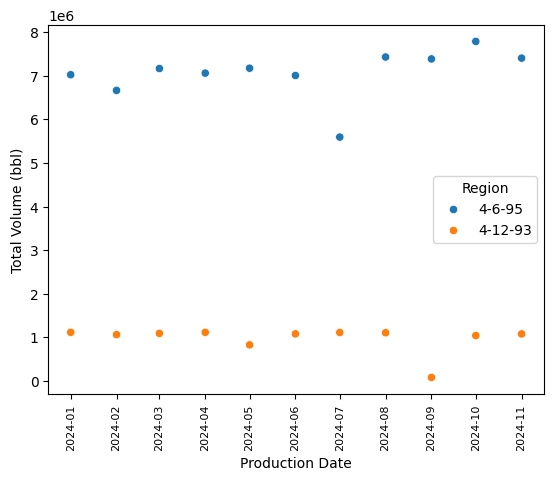

In [ ]:
Suncore_Top_region=regional_summary[(regional_summary['OperatorName']=='SUNCOR ENERGY INC.')]
#'SUNCOR ENERGY INC.', 'IMPERIAL OIL RESOURCES LIMITED', 'CONOCOPHILLIPS CANADA RESOURCES CORP.'])]
sns.scatterplot(data=Suncore_Top_region,x='Production_Date',y='Total_Volume',hue='Region')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

Surprisingly, only 2 regions for Suncore were reported for 2024. One of them seems to represent approximately 7 times the other one, no point of a pie chart in this situation. The regions are shown in the map below

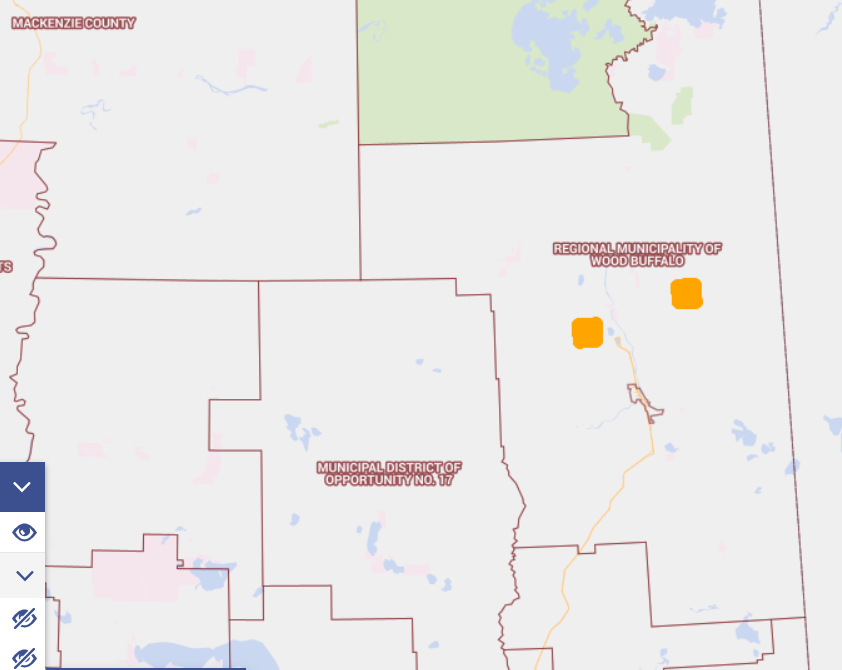

Imperial Oil

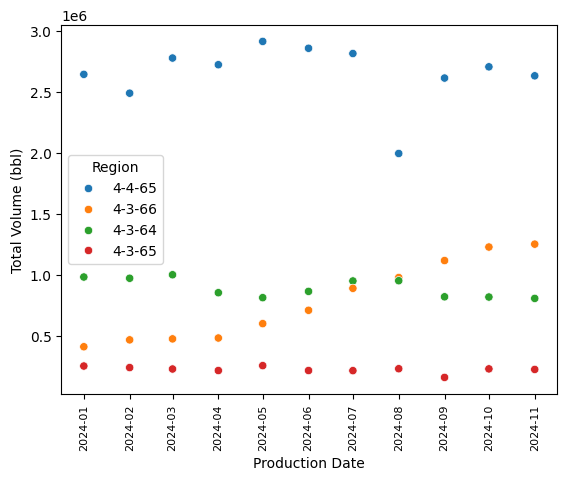

In [ ]:
ImperialOil_Top_region=regional_summary[(regional_summary['OperatorName']=='IMPERIAL OIL RESOURCES LIMITED')]

sns.scatterplot(data=ImperialOil_Top_region,x='Production_Date',y='Total_Volume',hue='Region')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

Imperial Oil Limited has only Oil being produced in 4 regions. Let's put them on the map and represent the overall production.

One thing to mention is that production over the last year. The top region is steady overall, with a drop in August, but a recovery in the next month. Also, the yellow zone seem to be increasing over time, whereas the green one is steady.

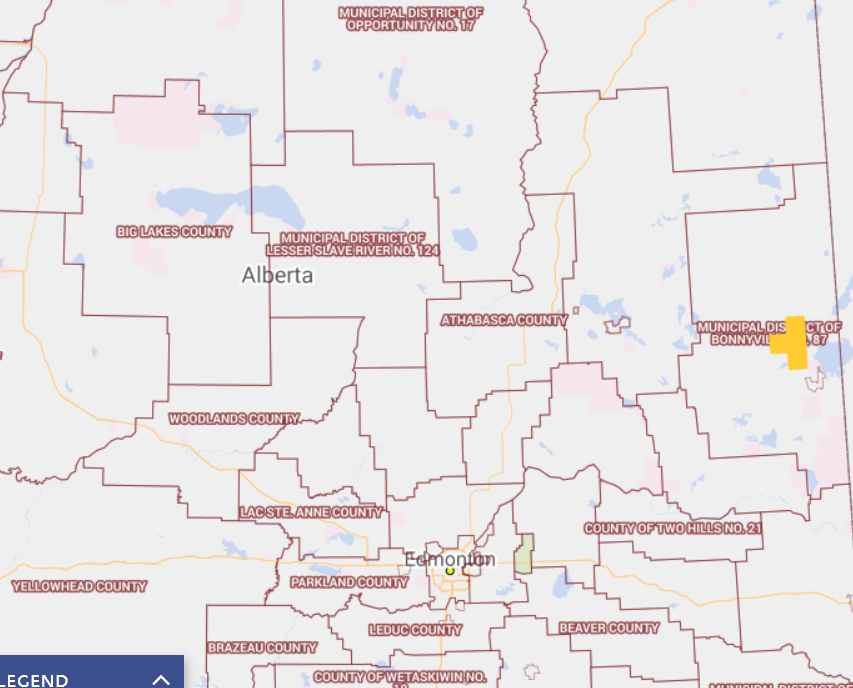

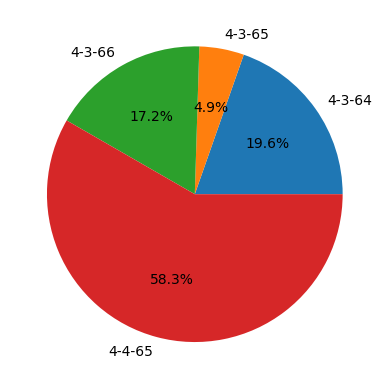

In [ ]:
Imperial_total=Region_total[Region_total['OperatorName']=='IMPERIAL OIL RESOURCES LIMITED']
Imperial_total = Imperial_total.drop(columns=['OperatorName'])

plt.pie(Imperial_total['Total_Volume'], labels=Imperial_total['Region'], autopct='%1.1f%%')
plt.show()

ConocoPhillips

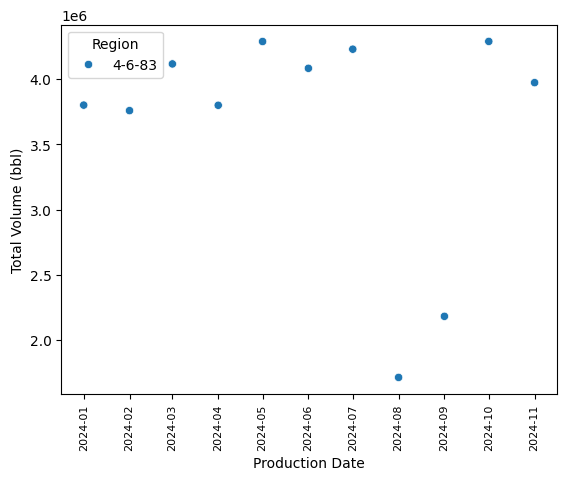

In [ ]:
Conoco_Top_region=regional_summary[(regional_summary['OperatorName']=='CONOCOPHILLIPS CANADA RESOURCES CORP.')]
sns.scatterplot(data=Conoco_Top_region,x='Production_Date',y='Total_Volume',hue='Region')
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Total Volume (bbl)')
plt.xlabel('Production Date')
plt.show()

For the fifth highest company, there's only 1 region of oil production. It seemed to have a decline during august and september and restabilized in october.

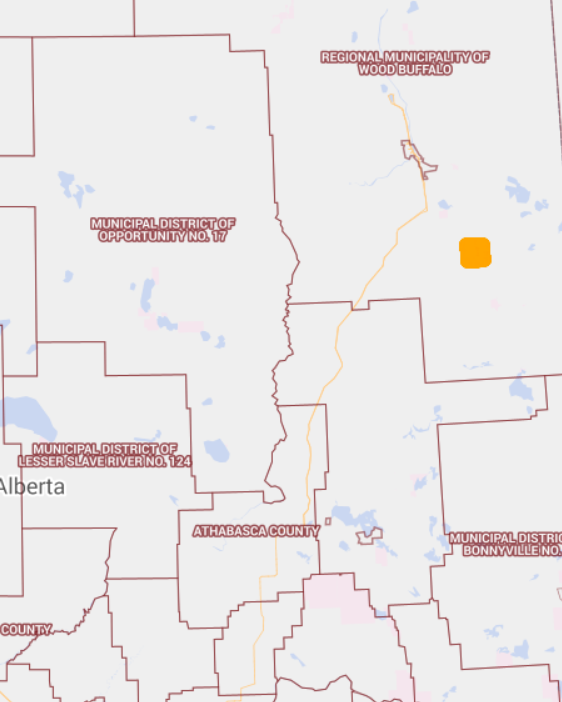

Summary of findings so far:

1. All oil production data from petrinex for the last year was loaded and combined into a single dataframe.
2. This project was only focused on oil production. The data was cleaned and changed the data type for the interested columns.
3. The top 5 companies on oil production were: Cenovus Energy Inc., Canadian Natural Resources Limited, Suncor Energy Inc., Imperial Oil Resources Limited, and Conoco Philips Canada Resources Corp
4. The top 5 companies produced the equivalent of 61% of all oil during 2024, while the rest of the companies the total of 39.1%.
5. There isn't much season variability overall, other than a decrease in september but a recovery in the following month.
6. Cenovus has several regions of production, 97.5% of all oil is produced in 3 regions.
7. CNRL has a more diverse oil production. Over 63% of it's total production comes from the top 5 regions, which are relatively close to each other.
8. Suncore only has 2 production regions, Imperial oil has 4 and Conoco Philips has 1. It's clear that the monopoly is owned by the first 2 companies.